In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def convolution2(image, kernel, axe):

    kernel_size = len(kernel)
    padding = kernel_size // 2

    if axe == 0:
        padded_image = np.pad(image, ((padding, padding), (0, 0)), mode='constant', constant_values=0)
    else:  
        padded_image = np.pad(image, ((0, 0), (padding, padding)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if axe == 0:
                slice_obj = padded_image[i:i + kernel_size, j]
            else:  
                slice_obj = padded_image[i, j:j + kernel_size]

            result[i, j] = np.sum(slice_obj * kernel)
            if result[i, j] < 0:
                result[i, j] = 0
            elif result[i, j] > 255:
                result[i, j] = 255
            

    return result

In [3]:
def calculate_gradient_orientation_custom(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # gradiant filters
    filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = cv2.filter2D(gray, cv2.CV_64F, filter_x)
    gradient_y = cv2.filter2D(gray, cv2.CV_64F, filter_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    gradient_orientation = np.arctan2(gradient_y, gradient_x)

    return gradient_magnitude, gradient_orientation


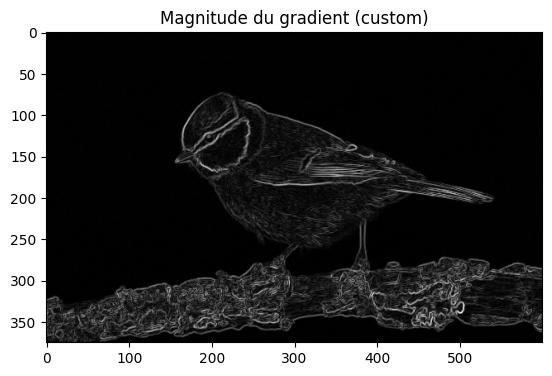

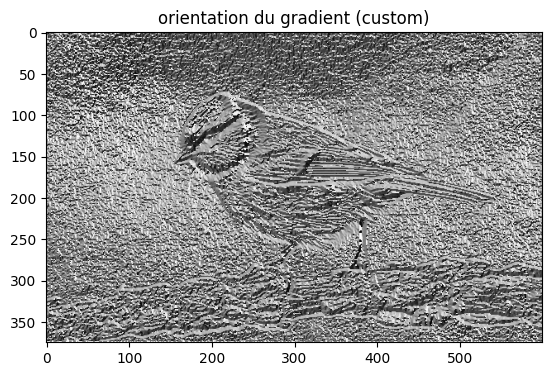

In [4]:
image_path = "grayscale.png"
image = cv2.imread(image_path)

magnitude_custom, orientation_custom = calculate_gradient_orientation_custom(image)

plt.imshow(magnitude_custom, cmap="gray"), plt.title('Magnitude du gradient (custom)')
plt.show()

plt.imshow(orientation_custom, cmap="gray"), plt.title('orientation du gradient (custom)')
plt.show()

In [5]:
def apply_edge_detection(magnitude, threshold):
    # Create a binary image where edges are above the threshold
    edges = np.zeros_like(magnitude)
    edges[magnitude > threshold] = 255

    return edges

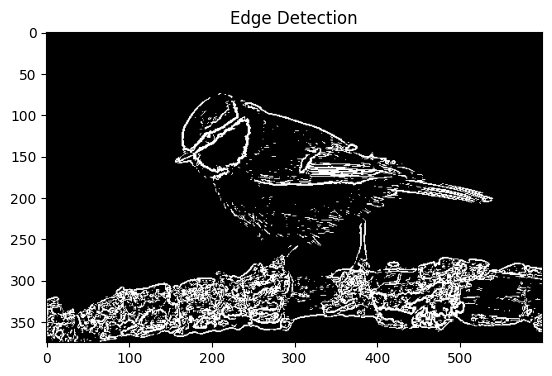

In [10]:
threshold_value = 165

# Apply edge detection based on magnitude and threshold
edges = apply_edge_detection(magnitude_custom, threshold_value)

# Display the results
plt.imshow(edges, cmap="gray")
plt.title('Edge Detection')
plt.show()